In [12]:
import os
import glob
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

In [13]:
def retrieve(start, end, data):
    
    """
    This is a function used to retrieve timeseries data within specific time duration.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset/file (needs to be either a dataframe or filename string)
        
    Return:
        data_df: a dataframe that shows the within the defined time range
    """
    import os
    import datetime as dt
    from datetime import datetime
    import pandas as pd
    from zoneinfo import ZoneInfo
    
    if isinstance(data, str):
        path = 'clean_data'
        path = os.path.join(path, data)
        data = pd.read_csv(path)
    elif isinstance(data, pd.DataFrame):
        data = data
    else:
        raise TypeError("input must be a string or a dataframe")
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'], utc=True).dt.tz_convert('America/Los_Angeles')
    start = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    end = datetime.strptime(end, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    after_start_date = data["date"] >= start
    before_end_date = data["date"] <= end
    between_two_dates = after_start_date & before_end_date
    
    # Using pandas.DataFrame.loc to Filter Rows by Dates
    data_df = data.loc[between_two_dates]
    return data_df

In [14]:
int_temp = retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'zone_temp_interior.csv')
int_temp.head(3)

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,cerc_templogger_4,cerc_templogger_5,cerc_templogger_6,cerc_templogger_7,cerc_templogger_8,cerc_templogger_9
123237,2020-07-01 00:00:00-07:00,23.812,24.687,25.375,22.687,24.187,24.00,25.375,24.437,22.062,25.750,23.750,24.625,24.250,24.937,23.312,24.312
123238,2020-07-01 00:10:00-07:00,23.625,24.750,25.500,22.687,24.125,24.25,25.312,24.375,22.125,25.562,23.812,24.500,24.187,24.562,23.000,24.250
123239,2020-07-01 00:20:00-07:00,23.750,24.750,25.500,22.625,24.000,24.00,25.250,23.875,22.062,25.437,24.000,24.500,24.187,24.687,23.375,24.437


In [15]:
co2 = retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'zone_co2.csv')

In [16]:
ele = retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'ele.csv')
ele.head(5) # not really used

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S,Unnamed: 6
85411,2020-07-01 00:00:00-07:00,0.175000,0.200000,1.798962,9.430000,26.537500,21.552353
85412,2020-07-01 00:15:00-07:00,0.100000,0.211111,1.091971,8.812500,25.973684,20.226667
85413,2020-07-01 00:30:00-07:00,0.237500,0.054545,1.404549,9.007000,26.810000,21.465000
85414,2020-07-01 00:45:00-07:00,0.050000,0.000000,1.299737,8.620000,26.368750,22.686250
85415,2020-07-01 01:00:00-07:00,0.257143,0.022222,1.335468,8.833333,26.736842,24.688889


In [17]:
def hourly(start, end, data):
    
    """
    This is a function defined to derive hourly summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the hourly summary of the input dataset

    """
    
    import datetime as dt
    from datetime import datetime
    import numpy as np
    from zoneinfo import ZoneInfo
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'])
    interval = dt.timedelta(hours=1)
    hourly_df = pd.DataFrame(columns=[data.columns])
    value_df = pd.DataFrame()
    time_df = pd.DataFrame()
    data_temp = pd.Series()
    while start < end:
        end_next = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone) + interval
        end_next = datetime.strftime(end_next, "%Y-%m-%d %H:%M:%S")
        value = retrieve(start, end_next, data).mean(numeric_only=True)
        date = pd.Series({'date': start}, dtype='datetime64[ns]')
        value_df = pd.concat([value_df, pd.DataFrame(value).transpose()], axis = 0)
        time_df = pd.concat([time_df, pd.DataFrame(date).transpose()], axis = 0)
        start = end_next

    hourly_df = pd.concat([time_df, value_df], axis = 1).reset_index(drop=True)
    
    return hourly_df

In [18]:
hourly_co2 = hourly('2020-07-01 00:00:00', '2020-08-01 00:00:00', co2)
hourly_co2.head(3)

/tmp/ipykernel_8376/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


,date,zone_022_co2,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2020-07-01 00:00:00,72.000000,418.137097,414.903226,410.532258,413.508065,418.685484,416.008065,410.596774,413.258065,420.604839,413.096774
1,2020-07-01 01:00:00,341.381257,419.580645,415.887097,410.612903,413.201613,418.451613,419.024194,410.895161,412.459677,421.056452,411.282258
2,2020-07-01 02:00:00,338.515280,417.806452,415.354839,411.564516,412.362903,418.758065,415.540323,407.467742,409.419355,419.048387,410.870968


In [19]:
def avg_data(data, columnName):
    """
    helper function to take the average of all the data except 'date'
    Arg:
        data: input the data to take the average of
    Return:
        data_df: a dataframe that shows the average of the input dataset
    """
    data[columnName] = data.loc[:, data.columns != 'date'].mean(axis=1)
    return data[['date', columnName]]

In [20]:
co2_mean = avg_data(hourly_co2, 'average co2')

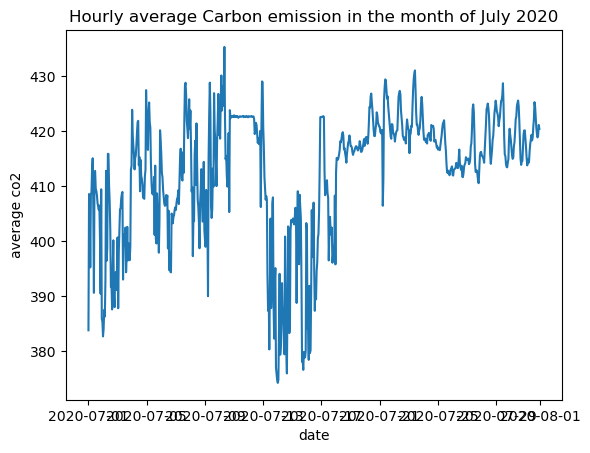

In [21]:
plt.plot(co2_mean['date'], co2_mean['average co2'])
plt.ylabel('average co2')
plt.xlabel('date')
plt.title('Hourly average Carbon emission in the month of July 2020');

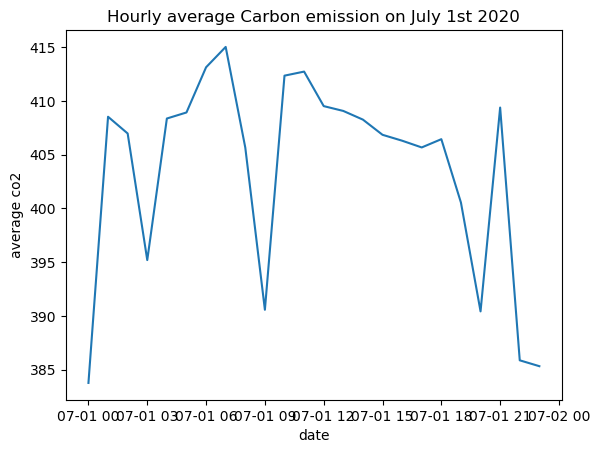

In [22]:
plt.plot(co2_mean['date'].head(24), co2_mean['average co2'].head(24))
plt.ylabel('average co2')
plt.xlabel('date')
plt.title('Hourly average Carbon emission on July 1st 2020');
plt.savefig('images/hourly-july1st_co2.png')

In [23]:
hourly_int_temp = hourly('2020-07-01 00:00:00', '2020-08-01 00:00:00', int_temp)

/tmp/ipykernel_8376/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


In [24]:
int_temp_mean = avg_data(hourly_int_temp, 'average interior temperature')
int_temp_mean

,date,average interior temperature
0,2020-07-01 00:00:00,24.132598
1,2020-07-01 01:00:00,24.041071
2,2020-07-01 02:00:00,23.988571
3,2020-07-01 03:00:00,23.963473
4,2020-07-01 04:00:00,23.952902
...,...,...
739,2020-07-31 19:00:00,24.568384
740,2020-07-31 20:00:00,24.547152
741,2020-07-31 21:00:00,24.453455
742,2020-07-31 22:00:00,24.317830


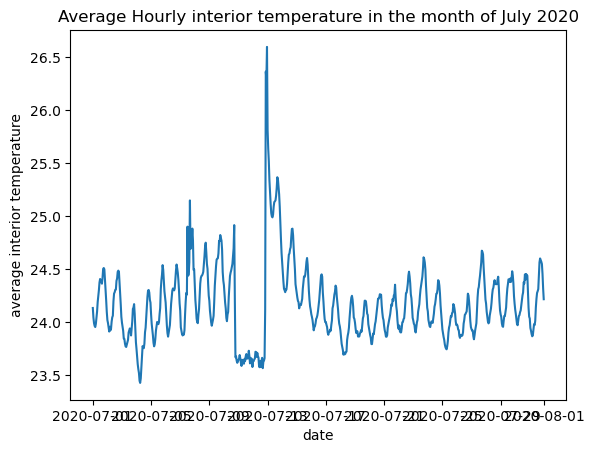

In [25]:
plt.plot(int_temp_mean['date'], int_temp_mean['average interior temperature'])
plt.ylabel('average interior temperature')
plt.xlabel('date')
plt.title('Average Hourly interior temperature in the month of July 2020');

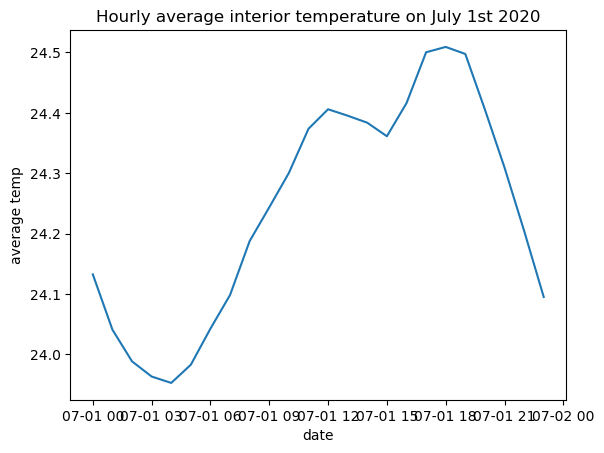

In [26]:
plt.plot(int_temp_mean['date'].head(24), int_temp_mean['average interior temperature'].head(24))
plt.ylabel('average temp')
plt.xlabel('date')
plt.title('Hourly average interior temperature on July 1st 2020');
plt.savefig('images/hourly-july1st interior temp.png')

In [27]:
combined_df = co2_mean.head(24).merge(int_temp_mean.head(24), on = 'date')
combined_df.head(2)

,date,average co2,average interior temperature
0,2020-07-01 00:00:00,383.757331,24.132598
1,2020-07-01 01:00:00,408.530261,24.041071


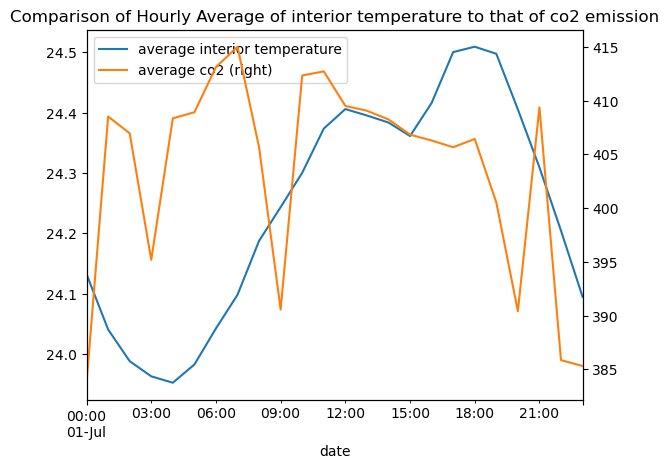

In [28]:
fig, ax = plt.subplots()
combined_df.plot(x = 'date', y = 'average interior temperature', ax = ax) 
combined_df.plot(x = 'date', y = 'average co2', ax = ax, secondary_y = True) 
plt.title('Comparison of Hourly Average of interior temperature to that of co2 emission');
plt.savefig('images/co2 vs int-temp.png')

The plot doesn't seem show any big correlation between the average interior temperature and the average co2 emission. I decided to compare these two factors because I assumed that the increase or decrease of interior temperature meant the usage of air conditioning inside the building, and thus, wanted to compare how much the usage of air conditioning affects the emission of co2. However, I was not able to reach the conclusion that I had hoped to make from the data upon plotting them. This graph shows that either the building relies on other resources that aren't air conditioning (that emit little co2) to maintain interior temperature or that the building's air conditioning system emits co2 that is comparably negligible to other sources of the building that emit co2. 

In [29]:
hourly_ele = hourly('2020-07-01 00:00:00', '2020-07-02 00:00:00', ele)
ele_mean = avg_data(hourly_ele, 'average energy usage')
ele_mean.head(2)

/tmp/ipykernel_8376/975817140.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_temp = pd.Series()


,date,average energy usage
0,2020-07-01 00:00:00,9.866233
1,2020-07-01 01:00:00,9.712098


In [30]:
combined_ele_temp = ele_mean.merge(int_temp_mean.head(24), on = 'date')
combined_ele_temp.head(2)

,date,average energy usage,average interior temperature
0,2020-07-01 00:00:00,9.866233,24.132598
1,2020-07-01 01:00:00,9.712098,24.041071


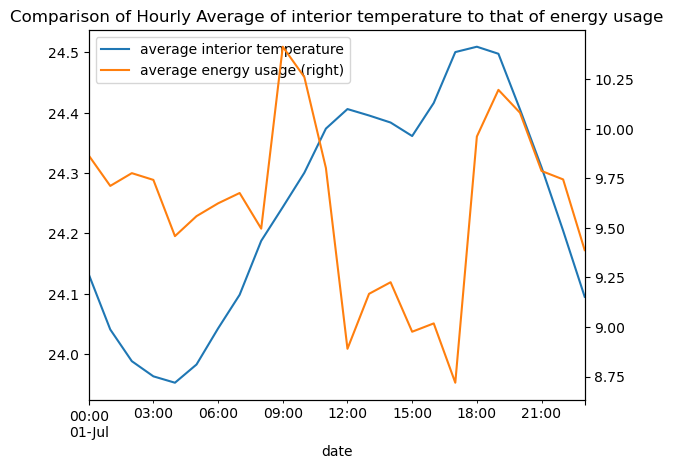

In [31]:
fig, ax = plt.subplots()
combined_ele_temp.plot(x = 'date', y = 'average interior temperature', ax = ax) 
combined_ele_temp.plot(x = 'date', y = 'average energy usage', ax = ax, secondary_y = True) 
plt.title('Comparison of Hourly Average of interior temperature to that of energy usage');

In [32]:
combined_ele_co2 = ele_mean.merge(co2_mean.head(24), on = 'date')
combined_ele_co2.head(2)

,date,average energy usage,average co2
0,2020-07-01 00:00:00,9.866233,383.757331
1,2020-07-01 01:00:00,9.712098,408.530261


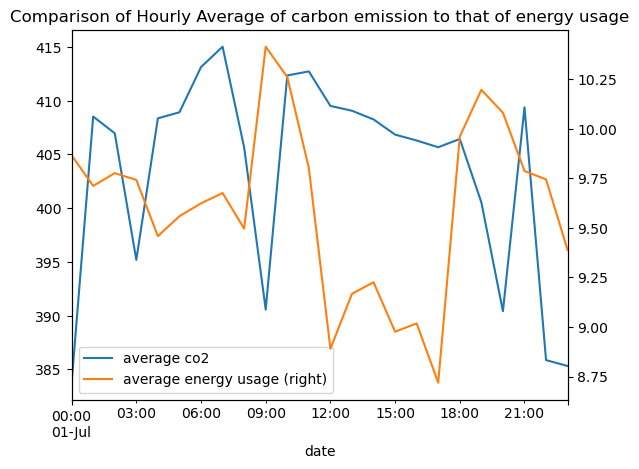

In [33]:
fig, ax = plt.subplots()
combined_ele_co2.plot(x = 'date', y = 'average co2', ax = ax) 
combined_ele_co2.plot(x = 'date', y = 'average energy usage', ax = ax, secondary_y = True) 
plt.title('Comparison of Hourly Average of carbon emission to that of energy usage');